# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
pip list

In [8]:
import tensorflow as tf
import os

## 1.2 Remove bad images

In [10]:
import cv2
import imghdr

C:\Users\sluo5\AppData\Local\Temp\ipykernel_17204\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image.path))

## 1.3 Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [42]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 8228 files belonging to 8 classes.


In [44]:
data_iterator = data.as_numpy_iterator()

In [46]:
# iterator to get another batch of data
batch = data_iterator.next()

In [48]:
# Images being represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [50]:
# Class 0 = burnable
# Class 1 = cans
# Class 2 = glass bottles
# Class 3 = non-burnable
# Class 4 = oversized waste
# Class 5 = pet bottles
# Class 6 = plastic materials
# Class 7 = recyclable paper
batch[1]

array([7, 5, 4, 0, 3, 3, 4, 0, 4, 7, 4, 4, 6, 5, 5, 4, 0, 7, 6, 7, 0, 3,
       6, 3, 5, 6, 0, 0, 0, 3, 0, 6])

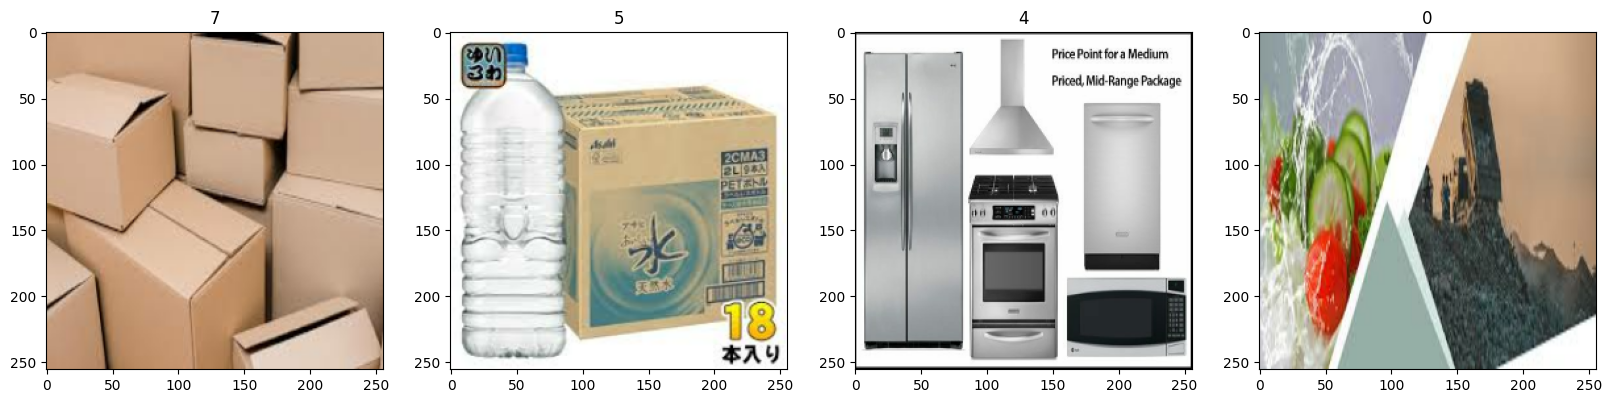

In [52]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale Data

In [54]:
data = data.map(lambda x,y: (x/255,y))

In [56]:
scaled_iterator = data.as_numpy_iterator()

In [58]:
batch = scaled_iterator.next()

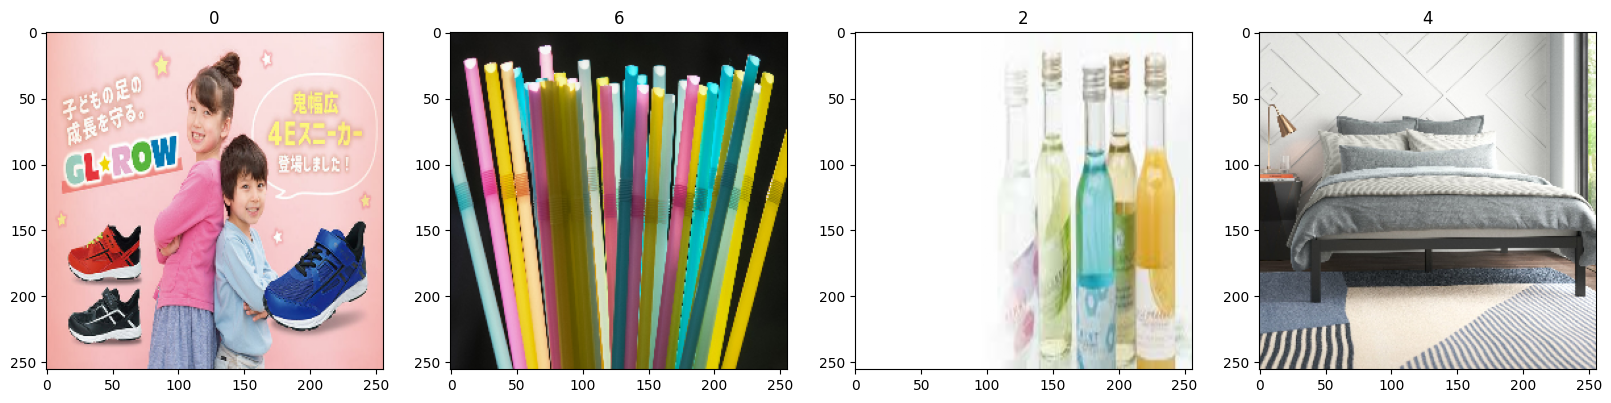

In [60]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2 Split Data

In [62]:
len(data)

258

In [64]:
train_size = int(len(data)*.7)

In [66]:
val_size = int(len(data)*.2) + 1

In [68]:
test_size = int(len(data)*.1) + 1

In [70]:
train_size + val_size + test_size

258

In [72]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 3. Deep Model

## 3.1 Build Deep Learning Modal

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical

In [110]:
model = Sequential()

In [112]:
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))  # Adding dropout after the first MaxPooling layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))  # Adding dropout after the first MaxPooling layer

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))  # Adding dropout after the first MaxPooling layer

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout after the first MaxPooling layer

# we have 8 classes so we need softmax activation function
model.add(Dense(8, activation='softmax'))

In [114]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698,424 (14.11 MB)

 Trainable params: 3,698,424 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
logdir='logs'

In [120]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [122]:
hist = model.fit(train, epochs=20, validation_data=(val), callbacks=[tensorboard_callback])

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.2521 - loss: 2.4119 - val_accuracy: 0.3233 - val_loss: 1.9465
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.2797 - loss: 1.9792 - val_accuracy: 0.3167 - val_loss: 1.9149
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.2731 - loss: 1.9445 - val_accuracy: 0.3125 - val_loss: 1.8864
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.2856 - loss: 1.8957 - val_accuracy: 0.3419 - val_loss: 1.8052
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.3070 - loss: 1.8296 - val_accuracy: 0.3552 - val_loss: 1.7652
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.3529 - loss: 1.7382 - val_accuracy: 0.3648 - val_loss: 1.7397
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 36s 198ms/step - accuracy: 0.3808 - loss: 1.6592 - val_accuracy: 0.3972 - val_loss: 1.6587
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.4266 - loss: 1

In [125]:
hist.history

{'accuracy': [0.2836805582046509,
  0.2923611104488373,
  0.2925347089767456,
  0.3081597089767456,
  0.33020833134651184,
  0.3626736104488373,
  0.39531248807907104,
  0.43611112236976624,
  0.47621527314186096,
  0.5163194537162781,
  0.5560764074325562,
  0.5986111164093018,
  0.6310763955116272,
  0.6592013835906982,
  0.684374988079071,
  0.7088541388511658,
  0.7194444537162781,
  0.7513889074325562,
  0.761631965637207,
  0.78125],
 'loss': [2.0903897285461426,
  1.9540613889694214,
  1.9140608310699463,
  1.8564600944519043,
  1.7913429737091064,
  1.7155495882034302,
  1.6355819702148438,
  1.55129873752594,
  1.424129605293274,
  1.3119410276412964,
  1.2229952812194824,
  1.1151268482208252,
  1.0151221752166748,
  0.9580032229423523,
  0.866664707660675,
  0.7988370060920715,
  0.7646514773368835,
  0.6909371018409729,
  0.653624415397644,
  0.6056948900222778],
 'val_accuracy': [0.3233173191547394,
  0.31670671701431274,
  0.3125,
  0.34194710850715637,
  0.35516828298568

# 3.3 Plot Performance

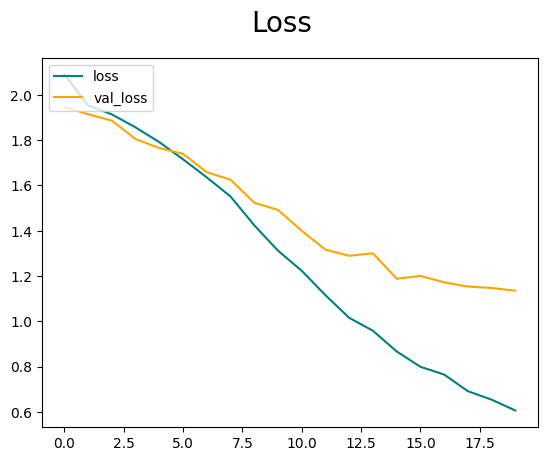

In [128]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

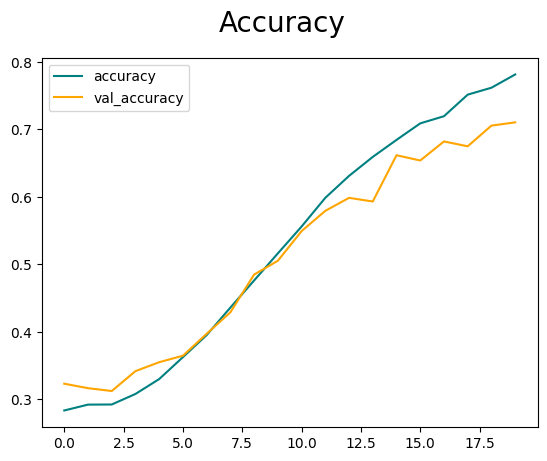

In [130]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [145]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [147]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [153]:
# Iterate over batches in the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Check dimensions of yhat and y
    print("yhat shape:", yhat.shape)
    print("y shape:", y.shape)

    # Convert yhat to class predictions (for multi-class classification)
    if yhat.ndim == 2:  # shape (batch_size, num_classes)
        yhat_classes = np.argmax(yhat, axis=-1)
    else:
        raise ValueError("Unexpected shape for yhat")

    # Convert y to class indices if it is one-hot encoded
    if y.ndim == 2:  # shape (batch_size, num_classes)
        y_classes = np.argmax(y, axis=-1)
    elif y.ndim == 1:  # shape (batch_size,)
        y_classes = y
    else:
        raise ValueError("Unexpected shape for y")

    # Update metrics
    pre.update_state(y_classes, yhat_classes)
    re.update_state(y_classes, yhat_classes)
    acc.update_state(y_classes, yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
yhat shape: 

In [155]:
# Compute metrics
precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = acc.result().numpy()

print(f"Precision: {precision_result}")
print(f"Recall: {recall_result}")
print(f"Accuracy: {accuracy_result}")

Precision: 0.917466402053833
Recall: 0.7913907170295715
Accuracy: 0.6153846383094788


# Test

In [158]:
import cv2

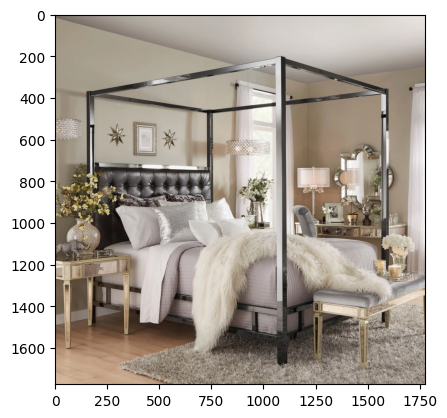

In [246]:
img = cv2.imread('bed.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

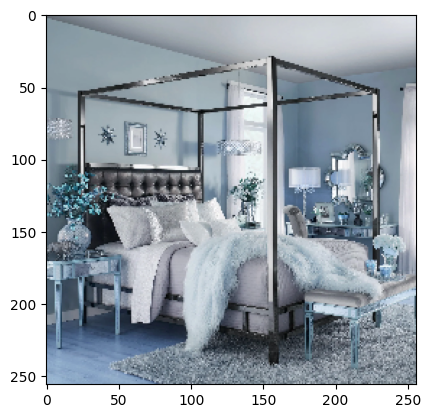

In [248]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [250]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [252]:
yhat

array([[0.28781357, 0.08706026, 0.02647717, 0.47364783, 0.00420788,
        0.00331102, 0.0071105 , 0.11037175]], dtype=float32)

In [254]:
# Class labels
class_labels = [
    'burnable',            # Class 0
    'cans',                # Class 1
    'glass bottles',       # Class 2
    'non-burnable',        # Class 3
    'oversized waste',     # Class 4
    'pet bottles',         # Class 5
    'plastic materials',   # Class 6
    'recyclable paper'     # Class 7
]

prob_array = yhat

# Traverse the array and map probabilities to class labels
for i, probs in enumerate(prob_array):
    # Find the index of the maximum probability
    predicted_class_index = np.argmax(probs)
    predicted_class_label = class_labels[predicted_class_index]
    
    print(f"Probabilities: {probs}")
    print(f"Predicted Class: {predicted_class_label} (Class {predicted_class_index})")

Probabilities: [0.28781357 0.08706026 0.02647717 0.47364783 0.00420788 0.00331102
 0.0071105  0.11037175]
Predicted Class: non-burnable (Class 3)
